In [351]:
import pandas as pd
import numpy as np
import joblib

In [352]:
data = pd.read_csv('global-data-on-sustainable-energy.csv')

data = pd.DataFrame(data)

In [353]:
data.dtypes


Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [354]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [355]:
# mean_col = ['Access to electricity (% of population)', 'Access to clean fuels for cooking','Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewable energy share in the total final energy consumption (%)','Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Value_co2_emissions_kt_by_country','Renewables (% equivalent primary energy)','gdp_growth','gdp_per_capita','Density(P/Km2)','Land Area(Km2)','Latitude','Longitude']

median_col = ['Access to electricity (% of population)', 'Renewables (% equivalent primary energy)','Financial flows to developing countries (US $)', 'Access to clean fuels for cooking','Renewable-electricity-generating-capacity-per-capita','Renewable energy share in the total final energy consumption (%)','Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Low-carbon electricity (% electricity)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Value_co2_emissions_kt_by_country','gdp_growth','gdp_per_capita','Density(P/Km2)','Land Area(Km2)','Latitude','Longitude']

In [356]:
obj_to_int = ['Density(P/Km2)', 'Land Area(Km2)']

for col in obj_to_int:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [357]:
from sklearn.impute import SimpleImputer

impute_mean = SimpleImputer(strategy='median')
joblib.dump(impute_mean,'imputer.pkl')
data[median_col] = impute_mean.fit_transform(data[median_col])


In [358]:
data.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [359]:
from sklearn.preprocessing import StandardScaler
scal_req_col = ['Land Area(Km2)','Financial flows to developing countries (US $)']

scaler = StandardScaler()
joblib.dump(scaler,'scaler.pkl')
scaler.fit_transform(data[scal_req_col])

array([[-0.03462133, -0.21780016],
       [-0.03462133, -0.21724947],
       [-0.03462133, -0.19812542],
       ...,
       [-0.03462133, -0.21785023],
       [-0.03462133, -0.21664872],
       [-0.03462133, -0.2177501 ]])

In [360]:
data.shape


(3649, 21)

In [361]:
from sklearn.preprocessing import OneHotEncoder

cat_col = ['Entity']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
joblib.dump(ohe,'encoder.pkl')
data_to_encode = data[cat_col]
encoded_data = ohe.fit_transform(data_to_encode)

# Create DataFrame from encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(data_to_encode.columns))

# Concatenate the original data with the encoded data
Data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
Data = Data.drop(cat_col, axis=1)




In [362]:
Data.shape

(3649, 196)

In [363]:
import numpy as np

def detect_and_remove_outliers(Data, threshold=3):
  """
  This function detects and removes outliers from a dataset using z-scores.

  Args:
      data (numpy.ndarray): A NumPy array containing the dataset.
      threshold (float, optional): The threshold for z-score above which a data point is considered an outlier. Defaults to 3.

  Returns:
      tuple: A tuple containing two elements:
          - inlier_data (numpy.ndarray): The data points without outliers (inliers).
          - outlier_data (numpy.ndarray): The data points identified as outliers.
  """
  mean = np.mean(Data)
  std = np.std(Data)
  z_scores = (Data - mean) / std

  # Identify outliers based on threshold
  outlier_mask = np.abs(z_scores) > threshold
  outlier_data = Data[outlier_mask]
  inlier_data = Data[~outlier_mask]

  return inlier_data, outlier_data

# Example usage (replace 'your_data' with your actual data)
inlier_data, outlier_data = detect_and_remove_outliers(Data)


F:\Users\DELL\PycharmProjects\Sustainable_energy\venv\new_python\3.12\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [364]:
inlier_data.shape

(3649, 196)

In [365]:
from sklearn.model_selection import train_test_split

x = Data.drop('Value_co2_emissions_kt_by_country', axis=1)
y = Data['Value_co2_emissions_kt_by_country']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

In [366]:
from xgboost import XGBRegressor
import joblib

model = XGBRegressor().fit(x_train,y_train)
joblib.dump(model,'model.pkl')


['model.pkl']

In [367]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


R^2 Score: 0.9980926709614629
Mean Squared Error: 649531208.6467444
Root Mean Squared Error: 25485.90215485307
Mean Absolute Error: 6279.11960222393
Mean Absolute Percentage Error: 0.9899216505982827


In [368]:

# inital(removed drop_col)
# R^2 Score: 0.9935696562978612
# Mean Squared Error: 2183376790.724549
# Root Mean Squared Error: 46726.61758274987
# Mean Absolute Error: 8956.88632302643
# Mean Absolute Percentage Error: 2.4811190642536243

#used drop_col too -- impute(strategy=mean)
# R^2 Score: 0.9931879063232545
# Mean Squared Error: 2312997239.183441
# Root Mean Squared Error: 48093.62992313474
# Mean Absolute Error: 9294.261663486544
# Mean Absolute Percentage Error: 3.5859127270207596

#used drop_col too -- impute(strategy=median)
# R^2 Score: 0.995072983807074
# Mean Squared Error: 1672932785.7826223
# Root Mean Squared Error: 40901.50102114374
# Mean Absolute Error: 8899.436247283427
# Mean Absolute Percentage Error: 3.2392032115701763

#aplying median strategy on all columns to impute null values
# R^2 Score: 0.9980926709614629
# Mean Squared Error: 649531208.6467444
# Root Mean Squared Error: 25485.90215485307
# Mean Absolute Error: 6279.11960222393
# Mean Absolute Percentage Error: 0.9899216505982827 


In [372]:
# Inital Evalution Metrics   -- droped to drop col
initial_metrics = {
    'R^2 Score': 0.9935696562978612,
    'Mean Squared Error': 2183376790.724549,
    'Root Mean Squared Error': 46726.61758274987,
    'Mean Absolute Error': 8956.88632302643,
    'Mean Absolute Percentage Error': 2.4811190642536243
}

# Utilized the drop_col by imputing null values by impute(strategy=mean)
mean_metrics = {
    'R^2 Score': 0.9931879063232545,
    'Mean Squared Error': 2312997239.183441,
    'Root Mean Squared Error': 48093.62992313474,
    'Mean Absolute Error': 9294.261663486544,
    'Mean Absolute Percentage Error': 3.5859127270207596
}

# Utilized the drop_col by imputing null values by impute(strategy=median)
median_metrics = {
    'R^2 Score': 0.995072983807074,
    'Mean Squared Error': 1672932785.7826223,
    'Root Mean Squared Error': 40901.50102114374,
    'Mean Absolute Error': 8899.436247283427,
    'Mean Absolute Percentage Error': 3.2392032115701763
}

all_median_coll = {'R^2 Score': 0.9980926709614629,
'Mean Squared Error': 649531208.6467444,
'Root Mean Squared Error': 25485.90215485307,
'Mean Absolute Error': 6279.11960222393,
'Mean Absolute Percentage Error': 0.9899216505982827}

# Calculate the percentage change in metrics from the initial model to the other two models
for metric in initial_metrics.keys():
    mean_change = ((mean_metrics[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100
    median_change = ((median_metrics[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100
    all_median_change = ((all_median_coll[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100
    print(f'Percentage change in {metric} on imputing null values in drop_col by mean: {mean_change}%')
    print(f'Percentage change in {metric} on imputing null values in drop_col by median: {median_change}%')
    print(f'Percentage change in {metric} on imputing null values in all columns by median: {all_median_change}%')
    

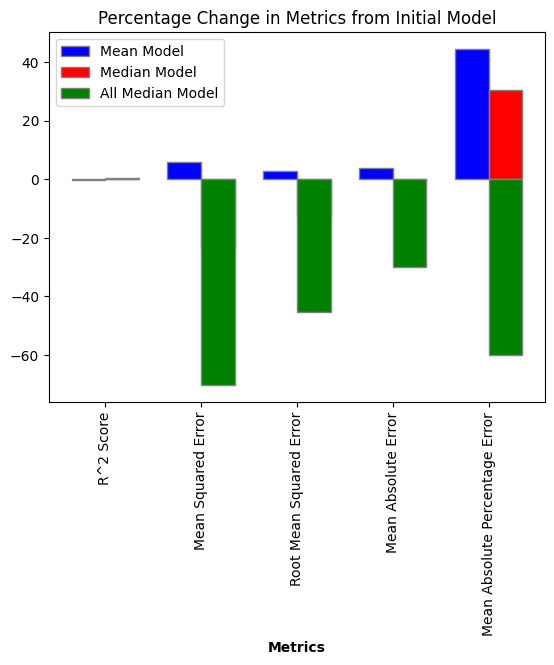

In [373]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = list(initial_metrics.keys())

# Calculate the percentage changes
mean_changes = [((mean_metrics[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100 for metric in metrics]
median_changes = [((median_metrics[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100 for metric in metrics]
all_median_changes = [((all_median_coll[metric] - initial_metrics[metric]) / initial_metrics[metric]) * 100 for metric in metrics]

# Define the bar width
bar_width = 0.35

# Define the bar positions
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Create the bars
plt.bar(r1, mean_changes, width=bar_width, color='b', edgecolor='grey', label='Mean Model')
plt.bar(r2, median_changes, width=bar_width, color='r', edgecolor='grey', label='Median Model')
plt.bar(r2, all_median_changes, width=bar_width, color='g', edgecolor='grey', label='All Median Model')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(mean_changes))], metrics, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.title('Percentage Change in Metrics from Initial Model')
plt.show()

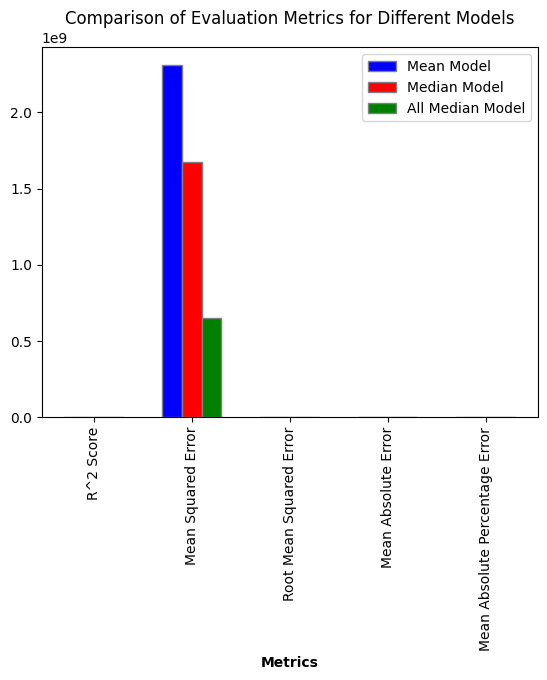

In [375]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = list(initial_metrics.keys())

# Calculate the percentage changes
mean_values = list(mean_metrics.values())
median_values = list(median_metrics.values())
all_median_values = list(all_median_coll.values())

# Define the bar width
bar_width = 0.2

# Define the bar positions
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, mean_values, width=bar_width, color='b', edgecolor='grey', label='Mean Model')
plt.bar(r2, median_values, width=bar_width, color='r', edgecolor='grey', label='Median Model')
plt.bar(r3, all_median_values, width=bar_width, color='g', edgecolor='grey', label='All Median Model')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mean_values))], metrics, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.show()

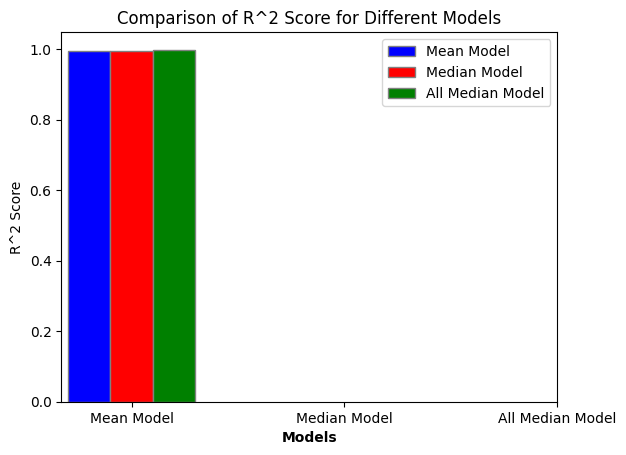

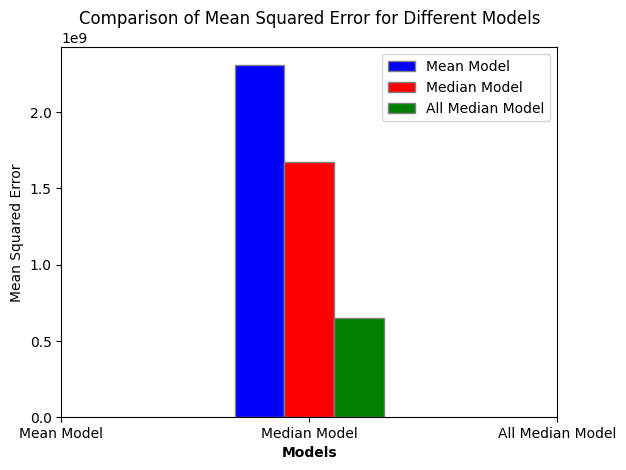

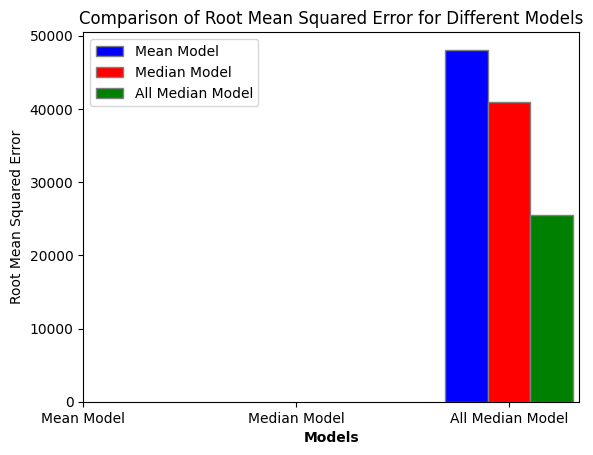

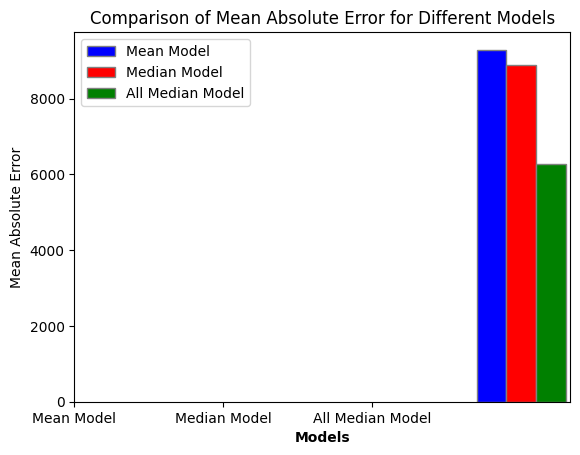

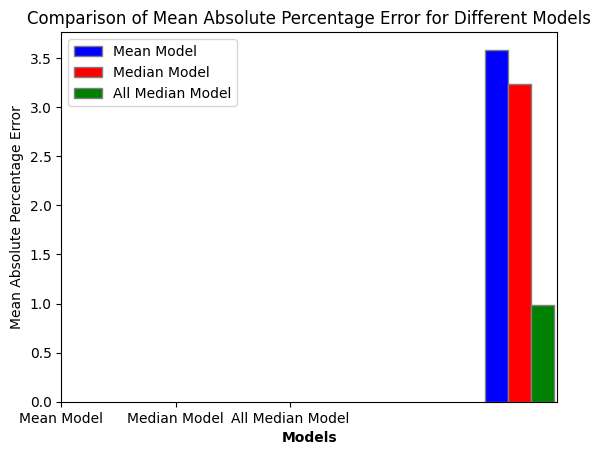

In [376]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = list(initial_metrics.keys())

# Calculate the values
mean_values = list(mean_metrics.values())
median_values = list(median_metrics.values())
all_median_values = list(all_median_coll.values())

# Define the bar width
bar_width = 0.2

# Define the bar positions
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create separate bar plots for each metric
for i, metric in enumerate(metrics):
    plt.figure(i)
    plt.bar(r1[i], mean_values[i], width=bar_width, color='b', edgecolor='grey', label='Mean Model')
    plt.bar(r2[i], median_values[i], width=bar_width, color='r', edgecolor='grey', label='Median Model')
    plt.bar(r3[i], all_median_values[i], width=bar_width, color='g', edgecolor='grey', label='All Median Model')
    plt.xlabel('Models', fontweight='bold')
    plt.xticks([r + bar_width for r in range(3)], ['Mean Model', 'Median Model', 'All Median Model'])
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Comparison of {metric} for Different Models')
    plt.show()

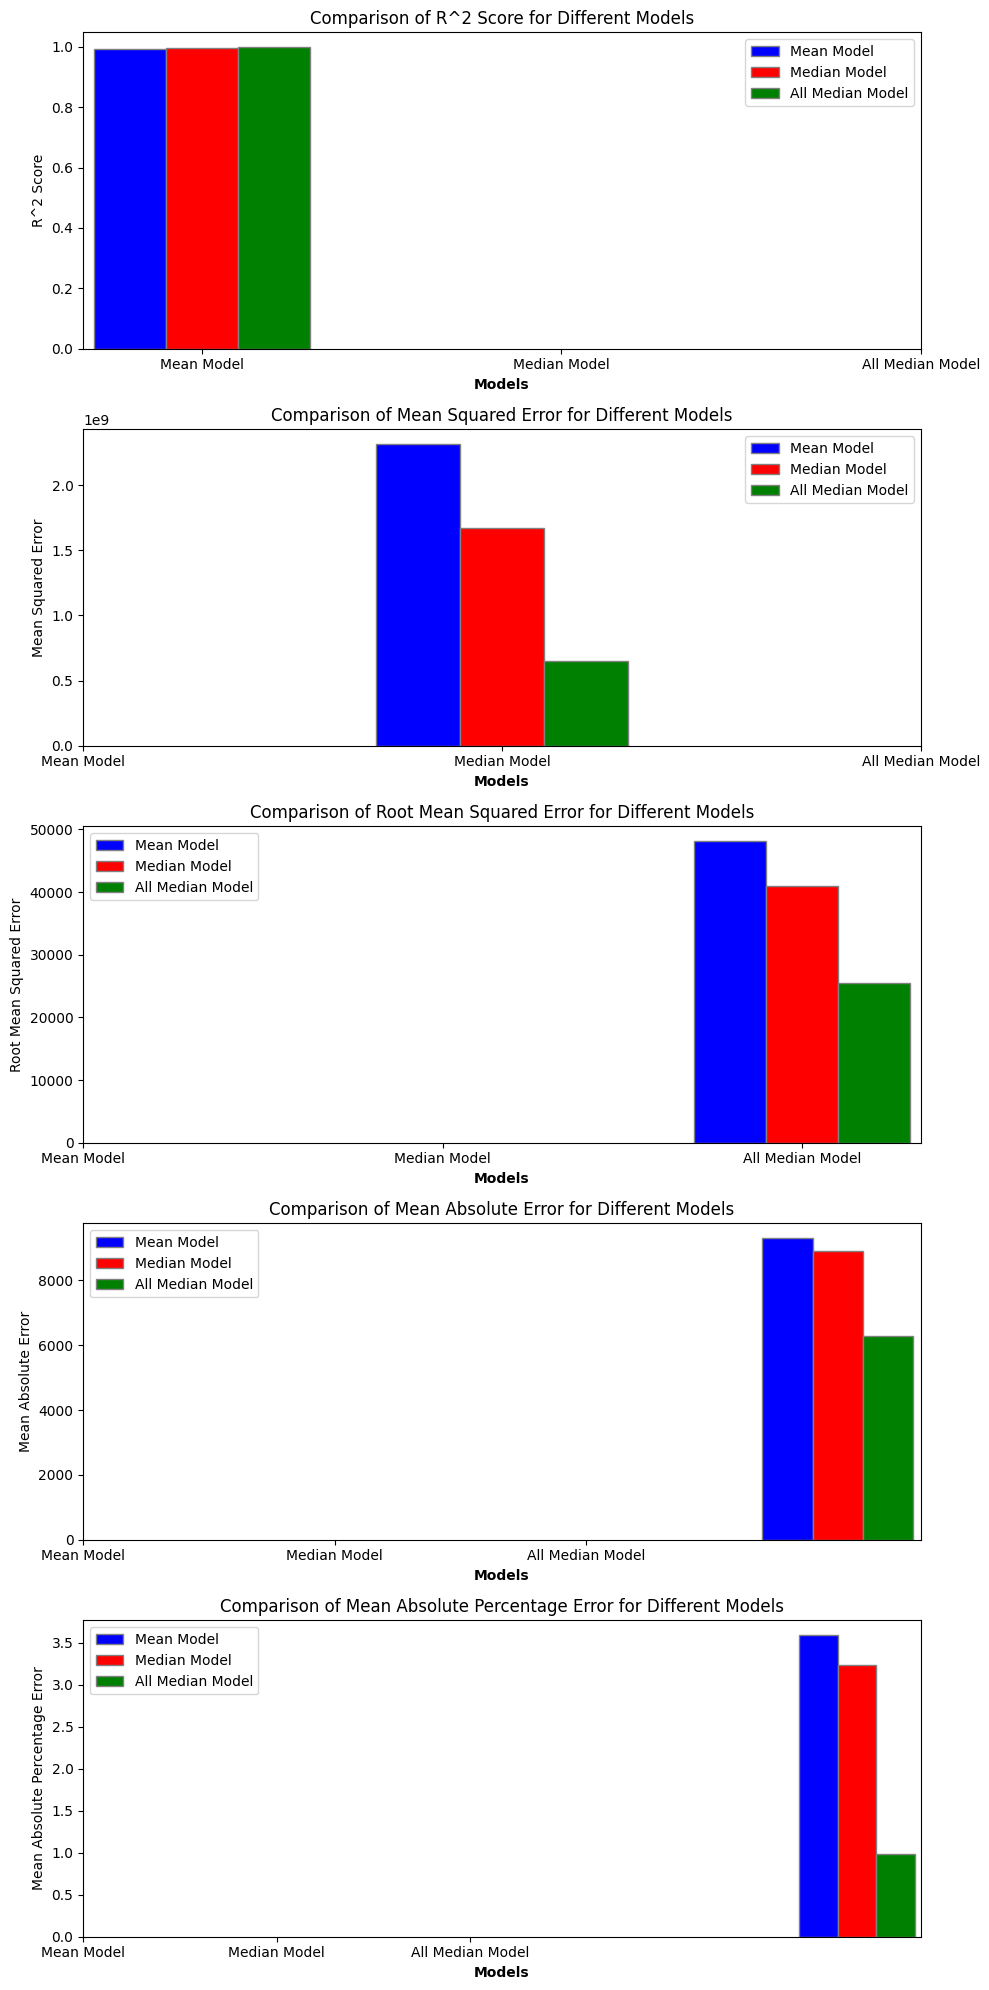

In [377]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = list(initial_metrics.keys())

# Calculate the values
mean_values = list(mean_metrics.values())
median_values = list(median_metrics.values())
all_median_values = list(all_median_coll.values())

# Define the bar width
bar_width = 0.2

# Define the bar positions
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create separate bar plots for each metric
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

for i, metric in enumerate(metrics):
    axs[i].bar(r1[i], mean_values[i], width=bar_width, color='b', edgecolor='grey', label='Mean Model')
    axs[i].bar(r2[i], median_values[i], width=bar_width, color='r', edgecolor='grey', label='Median Model')
    axs[i].bar(r3[i], all_median_values[i], width=bar_width, color='g', edgecolor='grey', label='All Median Model')
    axs[i].set_xlabel('Models', fontweight='bold')
    axs[i].set_xticks([r + bar_width for r in range(3)])
    axs[i].set_xticklabels(['Mean Model', 'Median Model', 'All Median Model'])
    axs[i].set_ylabel(metric)
    axs[i].legend()
    axs[i].set_title(f'Comparison of {metric} for Different Models')

plt.tight_layout()
plt.show()